uv init


uv pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_lg-3.8.0/ru_core_news_lg-3.8.0.tar.gz

In [1]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def semantic_analysis(sentence):
    # Загружаем NLP модель (более точную)
    nlp = spacy.load("ru_core_news_lg")  # Можно заменить на "ru_core_news_lg" для лучшего результата
    
    # Обрабатываем предложение
    doc = nlp(sentence)
    
    # Извлекаем именованные сущности
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Извлекаем подлежащие (существительные с нужными зависимостями)
    subjects = [token.text for token in doc if token.dep_ in ("nsubj", "nsubj_pass")]

    # Извлекаем глаголы
    verbs = [token.text for token in doc if token.pos_ == "VERB"]

    # Извлекаем объекты (прямые дополнения, обстоятельства, непрямые дополнения)
    objects = [token.text for token in doc if token.dep_ in ("obj", "obl", "dobj", "iobj", "attr")]

    # Извлекаем прилагательные (описание существительных)
    adjectives = [token.text for token in doc if token.pos_ == "ADJ"]

    # Извлекаем наречия (модификаторы)
    adverbs = [token.text for token in doc if token.pos_ == "ADV"]

    # Извлекаем предлоги (обозначают связи)
    prepositions = [token.text for token in doc if token.pos_ == "ADP"]

    # Извлекаем числительные
    numerals = [token.text for token in doc if token.pos_ == "NUM"]
    
    # Извлекаем модальные глаголы
    modal_verbs = [token.text for token in doc if token.tag_ in ("MD")]
    
    # Извлекаем союзы
    conjunctions = [token.text for token in doc if token.pos_ == "CCONJ"]
    
    # Извлекаем местоимения
    pronouns = [token.text for token in doc if token.pos_ == "PRON"]
    
    # Извлекаем междометия
    interjections = [token.text for token in doc if token.pos_ == "INTJ"]

    # Формируем связи между словами (зависимости)
    dependencies = [
    {
        "token": token.text,
        "dependency": token.dep_,
        "head": token.head.text,
        "children": [child.text for child in token.children]
    }
    for token in doc
    ]

    return {
        "entities": entities,
        "subjects": subjects,
        "verbs": verbs,
        "objects": objects,
        "adjectives": adjectives,
        "adverbs": adverbs,
        "prepositions": prepositions,
        "numerals": numerals,
        "modal_verbs": modal_verbs,
        "conjunctions": conjunctions,
        "pronouns": pronouns,
        "interjections": interjections,
        "dependencies": dependencies,
        "doc": doc  # Возвращаем doc для визуализации
    }

In [3]:
def visualize_dependencies(doc):
    G = nx.DiGraph()
    
    for token in doc:
        G.add_edge(token.head.text, token.text, label=token.dep_)
    
    # Определяем позиции узлов в соответствии со значимостью (по иерархии синтаксического дерева)
    pos = {}
    levels = {}
    level_counts = {}
    
    def assign_levels(token, level=0):
        if token.text not in levels or level < levels[token.text]:
            levels[token.text] = level
        level_counts[level] = level_counts.get(level, 0) + 1
        for child in token.children:
            assign_levels(child, level + 1)
    
    for token in doc:
        if token.head == token:
            assign_levels(token)
    
    offsets = {level: 0 for level in level_counts}
    for token in doc:
        level = levels[token.text]
        pos[token.text] = (offsets[level] - level_counts[level] / 2.0, -level)
        offsets[level] += 1
    
    plt.figure(figsize=(20, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10)
    edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Dependency Graph (Structured Layout)")
    plt.show()

In [4]:

sentence1 = "Красивая кошка спокойно сидит в Москве на мягком ковре, внимательно смотрит в окно и с интересом наблюдает за быстрой птицей."


sentence2 = '''6.2.13 Номинальный тепловой поток отопительного прибора не следует принимать менее, чем на 5% или на 60 Вт требуемого по расчету. '''
sentence3 = '''Номинальный тепловой поток отопительного прибора с терморегулятором следует принимать больше на 10-15% требуемого по расчету для возможности выбора потребителем диапазона комфортной температуры в пределах оптимальных норм и компенсации неучтенных дополнительных теплопотерь.'''

# Номинальный тепловой поток отопительного прибора с терморегулятором следует принимать больше на 10-15% требуемого по расчету для возможности выбора потребителем диапазона комфортной температуры в пределах оптимальных норм и компенсации неучтенных дополнительных теплопотерь.
sentence5 = "При расчете поверхности отопительных приборов следует учитывать тепловой поток, поступающий от трубопроводов системы отопления в помещение при открытой прокладке."
sentence6 = "Дополнительные потери теплоты через участки наружных ограждений, расположенных за отопительными приборами, а также трубопроводами, прокладываемыми в неотапливаемых помещениях, не должны превышать 7% теплового потока системы отопления здания."

In [5]:
# Запускаем анализ
result = semantic_analysis(sentence6)


In [6]:
for key, value in result.items():
    if key == "dependencies":
        print(f"{key}:")
        for dep in value:
            print(dep)
    else:
        print(f"{key}: {value}")

entities: []
subjects: ['потери']
verbs: ['прокладываемыми', 'неотапливаемых', 'превышать']
objects: ['приборами', 'помещениях', '%']
adjectives: ['Дополнительные', 'наружных', 'расположенных', 'отопительными', 'должны', 'теплового']
adverbs: ['также']
prepositions: ['через', 'за', 'в']
numerals: ['7']
modal_verbs: []
conjunctions: ['а']
pronouns: []
interjections: []
dependencies:
{'token': 'Дополнительные', 'dependency': 'amod', 'head': 'потери', 'children': []}
{'token': 'потери', 'dependency': 'nsubj', 'head': 'должны', 'children': ['Дополнительные', 'теплоты', 'участки']}
{'token': 'теплоты', 'dependency': 'nmod', 'head': 'потери', 'children': []}
{'token': 'через', 'dependency': 'case', 'head': 'участки', 'children': []}
{'token': 'участки', 'dependency': 'nmod', 'head': 'потери', 'children': ['через', 'ограждений']}
{'token': 'наружных', 'dependency': 'amod', 'head': 'ограждений', 'children': []}
{'token': 'ограждений', 'dependency': 'nmod', 'head': 'участки', 'children': ['нару

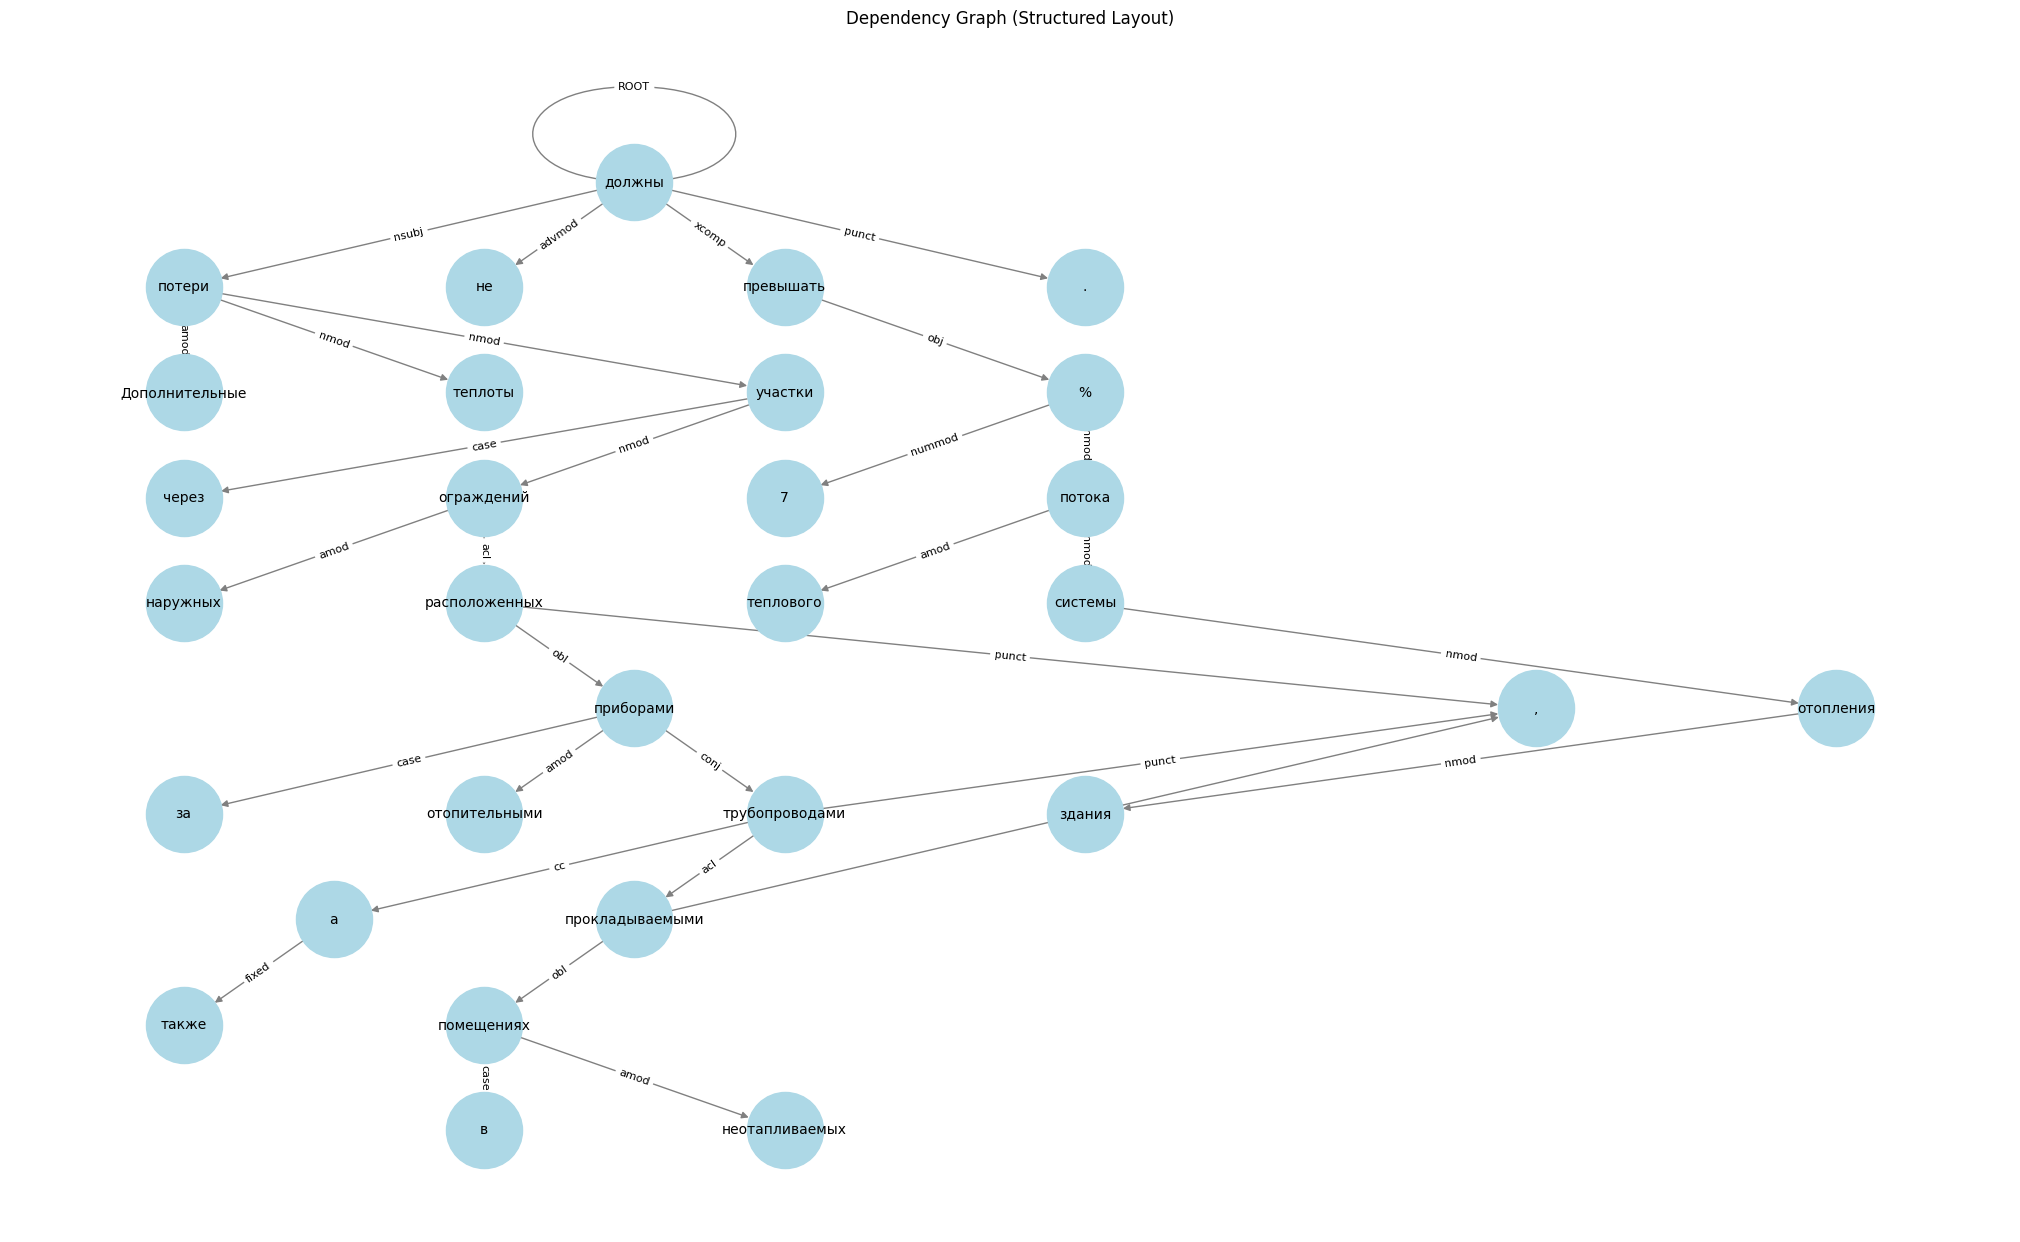

In [7]:
# Визуализируем зависимости
visualize_dependencies(result["doc"])